In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack
from matplotlib.colors import LogNorm

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

There are 2 global minima and the function value at those points is -1.0316284534898768
For an initial guess of [0, 0] the minimization method converge to a local minimum of value (0.0, 0.0)


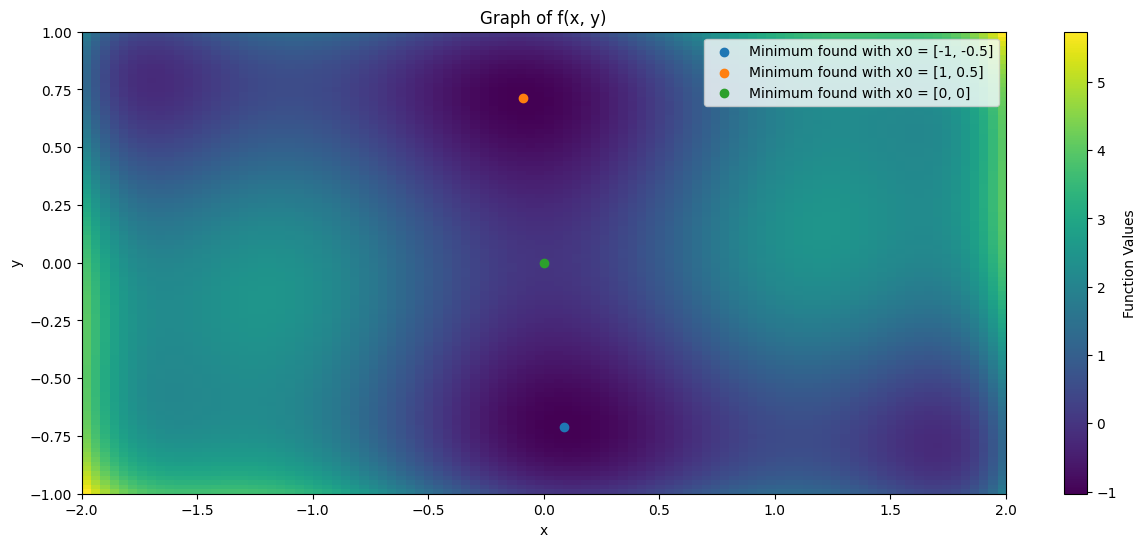

In [128]:
def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

# Minimize the function
x0 = ([-1,-0.5], [1,0.5], [0,0])
solutions = [optimize.minimize(f,x0[0]), optimize.minimize(f,x0[1]), optimize.minimize(f,x0[2])]

# Count the global minima
min_idx = np.argmin([solution['fun'] for solution in solutions])
count_min = 0
for solution in solutions:
    if np.allclose(solutions[min_idx]['fun'],solution['fun']):
        count_min += 1

print(f"There are {count_min} global minima and the function value at those points is {solutions[min_idx]['fun']}")
print(f"For an initial guess of {x0[2]} the minimization method converge to a local minimum of value {(solutions[2].x[0],solutions[2].x[1])}")

# Plot
x_min, x_max = -2, 2
y_min, y_max = -1, 1
x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
z = f([x,y])

fig = plt.figure(figsize=[15, 6])
plt.imshow(z, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
plt.colorbar(label='Function Values')
for i in range(len(x0)):
    plt.scatter(solutions[i].x[0], solutions[i].x[1], marker='o', label=f'Minimum found with x0 = {x0[i]}')

plt.title('Graph of f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Text(0.5, 1.0, 'Angular velocity')

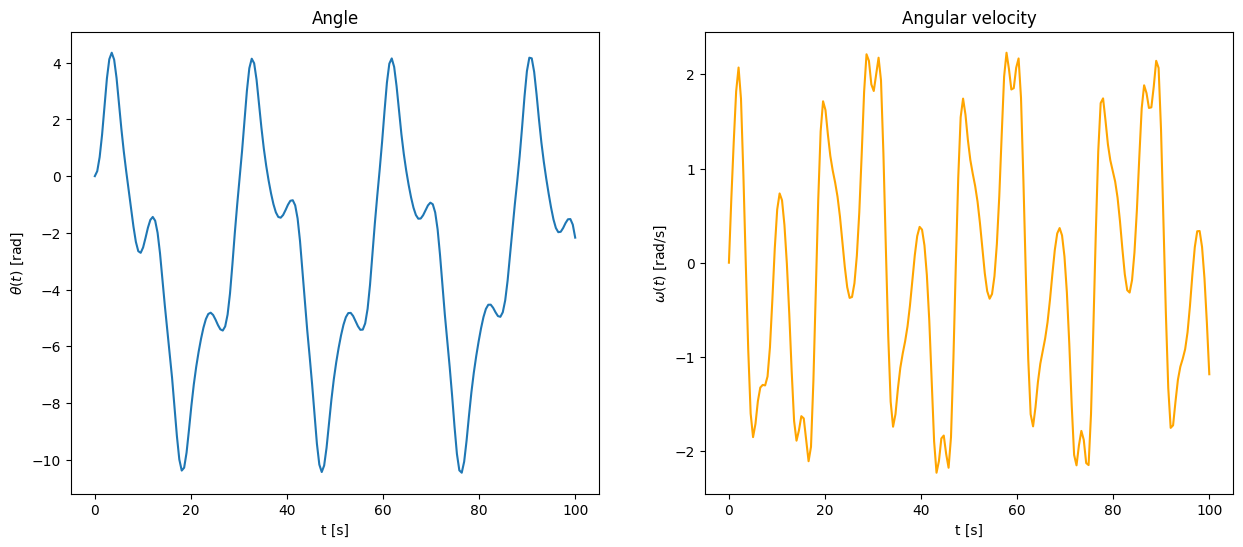

In [152]:
def derivative(X, t, Q, g, l, d, Omega):
    # X[1]: theta; X[2]: omega
    return (X[1], -(1/Q)*X[1] + (g/l)*np.sin(X[0]) + d*np.cos(Omega*t))

# Constants
l = 10
Q = 2.0
d = 1.5
g = 9.8
Omega = 0.65

# Initial values and time
theta0, omega0 = 0, 0
t = np.linspace(0, 100, 200)

# Solve
theta = odeint(derivative, (theta0, omega0), t, args=(Q,g,l,d,Omega))

# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1.plot(t, theta[:, 0])
ax1.set_xlabel('t [s]')
ax1.set_ylabel('$\\theta(t)$ [rad]')
ax1.set_title("Angle")

ax2.plot(t, theta[:, 1], color='orange')
ax2.set_ylabel('$\omega(t)$ [rad/s]')
ax2.set_xlabel('t [s]')
ax2.set_title("Angular velocity")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

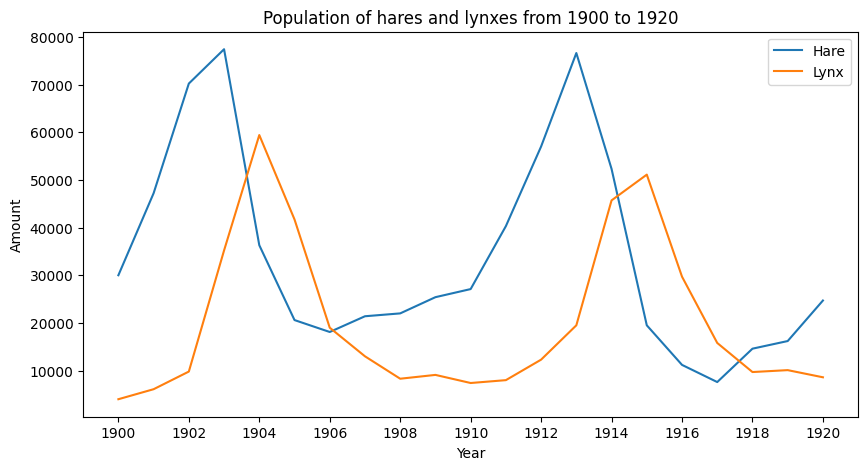

The period of Hares is approximately 10.5 years
The period of Lynxes is approximately 10.5 years


In [205]:
def compute_fft(x):
    fft = fftpack.fft(x)

    power = np.abs(fft)
    sample_freq = fftpack.fftfreq(x.size)

    freqs = sample_freq[np.where(sample_freq > 0)]
    powes = power[np.where(sample_freq > 0)]

    peak_freq = freqs[powes.argmax()]

    return (1/peak_freq)
    
data = np.loadtxt('data/populations.txt')
year, hare, lynx, _ = data.T

fig = plt.figure(figsize=(10,5))
plt.plot(year, hares)
plt.plot(year,lynx)
plt.legend(('Hare', 'Lynx'), loc='best')
plt.xticks(year[year[:] % 2 == 0])
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Population of hares and lynxes from 1900 to 1920")
plt.show()

print(f"The period of Hares is approximately {compute_fft(hare)} years")
print(f"The period of Lynxes is approximately {compute_fft(lynx)} years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Denoised Image')

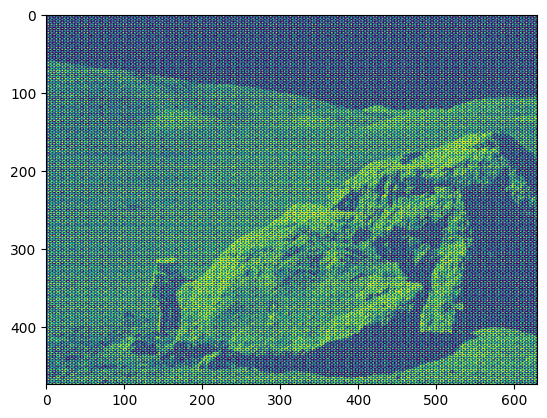

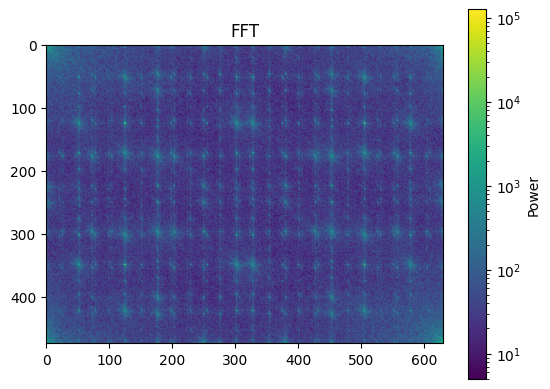

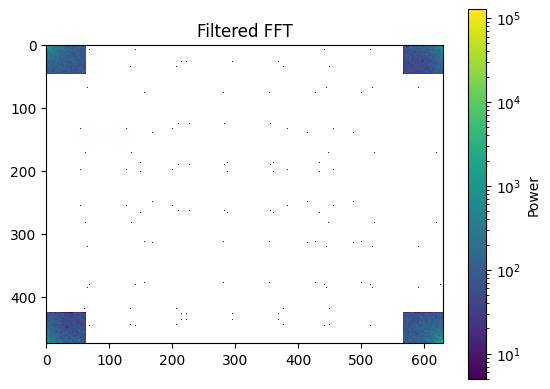

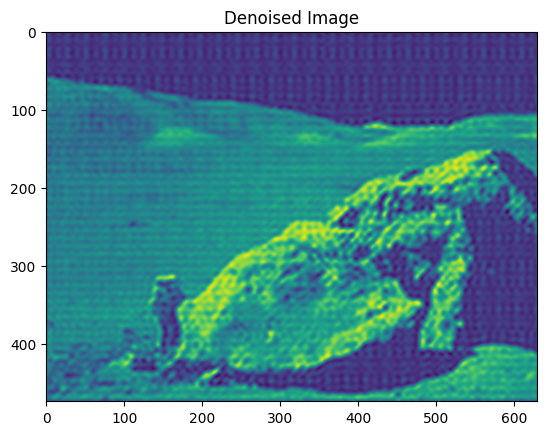

In [366]:
# Original image
img = plt.imread("images/moonlanding.png")
plt.figure()
plt.imshow(img)

# Compute FFT
img_fft = fftpack.fft2(img)

plt.figure()
plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
plt.colorbar(label='Power')
plt.title('FFT')

# Filter FFT
keep_fraction = 0.1

filtered_fft = img_fft.copy()
row, col = im_fft2.shape

filtered_fft[int(row*keep_fraction):int(row*(1-keep_fraction))] = 0
filtered_fft[:, int(col*keep_fraction):int(col*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(np.abs(filtered_fft), norm=LogNorm(vmin=5))
plt.colorbar(label='Power')
plt.title('Filtered FFT')

# Inverse FFt
filtered_img = fftpack.ifft2(filtered_fft)

plt.figure()
plt.imshow(np.abs(filtered_img))
plt.title('Denoised Image')